## 3-qubit circuit for Grover's algorithm 

Below, we will implement the following 3-qubit circuit to implement Grover's algorithm, 
where we set the two marked states, $$|w> = |101> \mathrm{and} \quad |110>$$

The initial state is $|\Psi_0> =|000>$, and this state will change when passing each gate, which we will trace.

In [1]:
import numpy as np 
from IPython.display import Image

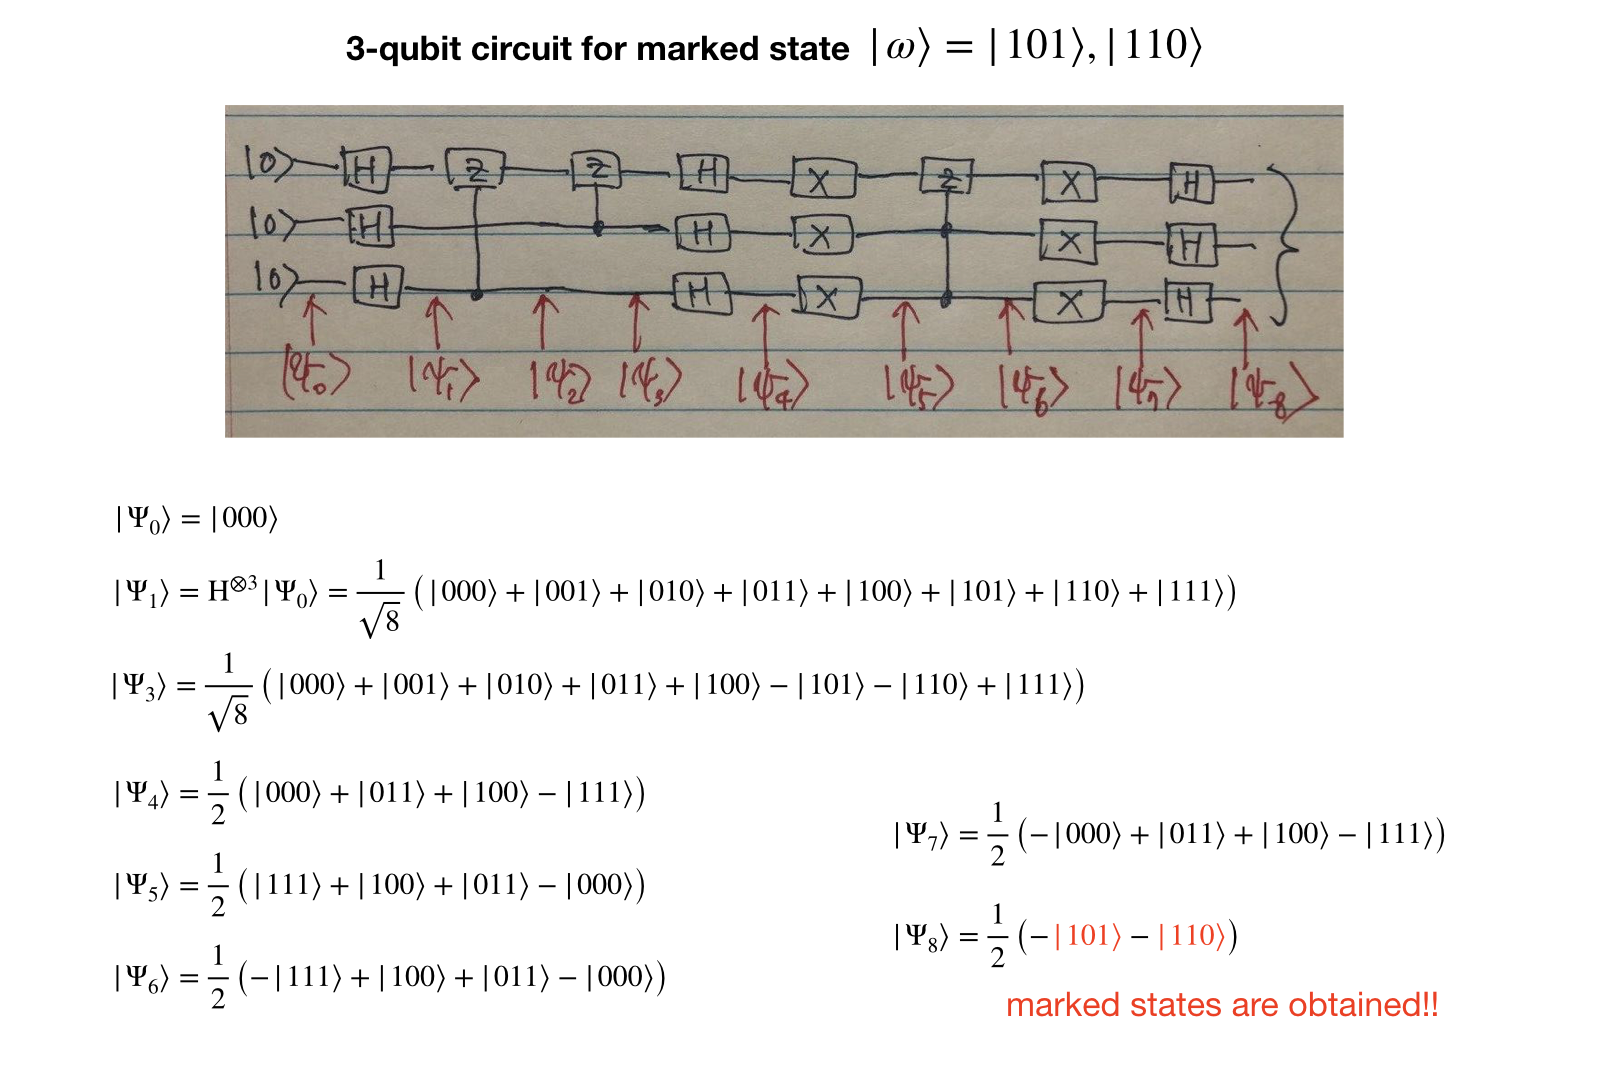

In [2]:

Image(filename='/Users/gimoonnam/Desktop/ImplementationOfGroverAlgorithm/grover_3-qubit.png')

In [3]:
def define_basisFor1Q():
    vec1Q = {}
    vec1Q['0'] = np.array([[1],[0]])
    vec1Q['1'] = np.array([[0],[1]])
    return vec1Q


In [4]:
def define_basisFor2Q(vec1q):
    vec2Q = {}
    vec2Q['00'] = np.kron(vec1q['0'],vec1q['0'])
    vec2Q['01'] = np.kron(vec1q['0'],vec1q['1'])
    vec2Q['10'] = np.kron(vec1q['1'],vec1q['0'])
    vec2Q['11'] = np.kron(vec1q['1'],vec1q['1'])
    return vec2Q
    

In [5]:
def define_basisFor3Q(vec1q, vec2q):
    vec3q={}
    vec3q['000'] = np.kron(vec1q['0'],vec2q['00'])
    vec3q['111'] = np.kron(vec1q['1'],vec2q['11'])
    vec3q['100'] = np.kron(vec1q['1'],vec2q['00'])
    vec3q['010'] = np.kron(vec1q['0'],vec2q['10'])
    vec3q['001'] = np.kron(vec1q['0'],vec2q['01'])
    vec3q['110'] = np.kron(vec1q['1'],vec2q['10'])
    vec3q['011'] = np.kron(vec1q['0'],vec2q['11'])
    vec3q['101'] = np.kron(vec1q['1'],vec2q['01'])

    # for key, value in vec3q.items():
    #     print(key, value)
    return vec3q 
    

def DefineIndexTable3Qubit2(vec3q):
    idxInVec3q = {}
    for key, vec in vec3q.items():
        idx = [i for i in range(vec.shape[0]) if vec[i]==1]
        idxInVec3q[idx[0]] = key
    return idxInVec3q 
    
# print(idxInVec3q)
# print(vec3q)



In [6]:
# define gates 
# H for Hadamard gate 
# X for X gate 
# I for identity gate 

nqubit = 3
N = np.power(2,nqubit)

H = np.matrix('1 1; 1 -1')
X = np.matrix('0 1; 1 0')
Z = np.matrix('1 0; 0 -1')
H = H/np.sqrt(2)
I = np.matrix('1 0; 0 1')
I2 = np.kron(I,I)
H2 = np.kron(H,H)
H3 = np.kron(H,H2)
X2 = np.kron(X,X)
X3 = np.kron(X,X2)

#matrix for ZCC gate, which only flips 111 to -111 
ZCC = np.kron(I,I2)
ZCC[7,7] = -1
print('ZCC=')
print(ZCC)

vec1q = define_basisFor1Q()
vec2q = define_basisFor2Q(vec1q)
vec3q = define_basisFor3Q(vec1q,vec2q)
idxInVec3q = DefineIndexTable3Qubit2(vec3q)

ZCC=
[[ 1  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0 -1]]


In [7]:
def ExpressInState(Psi):
    coeff = np.abs(Psi).max()
    Psi = Psi/coeff

    idx = [i for i in range(Psi.shape[0]) if np.abs(Psi[i])==1]
    vec = []
    for i in idx:
        vec.append(idxInVec3q[i])

    print(vec)
    

In [8]:
Psi_0 = vec3q['000']
Psi_1 = np.matmul(H3,Psi_0)
#print("Psi_1: ", Psi_1)

Psi_2 = np.zeros((N,1))
for key, value in vec3q.items():
    if key == '101' or key == '110':
        Psi_2 = Psi_2 - value
    else: 
        Psi_2 = Psi_2 + value
        
Psi_3 = Psi_2/np.sqrt(N)        
ExpressInState(Psi_3)

Psi_4 = np.matmul(H3,Psi_3)
print("Psi_4: ", Psi_4)
ExpressInState(Psi_4)

Psi_5 = np.matmul(X3, Psi_4)
ExpressInState(Psi_5)

Psi_6 = np.matmul(ZCC, Psi_5)
ExpressInState(Psi_6)

print('\n')
Psi_7 = np.matmul(X3, Psi_6)
print("Psi_7: ", Psi_7)
ExpressInState(Psi_7)


#final state of the above circuit 
print('\n')
Psi_8 = np.matmul(H3, Psi_7)
print("Psi_8: ", Psi_8)
ExpressInState(Psi_8)



['000', '001', '010', '011', '100', '101', '110', '111']
Psi_4:  [[ 0.5]
 [ 0. ]
 [ 0. ]
 [ 0.5]
 [ 0.5]
 [ 0. ]
 [ 0. ]
 [-0.5]]
['000', '011', '100', '111']
['000', '011', '100', '111']
['000', '011', '100', '111']


Psi_7:  [[-0.5]
 [ 0. ]
 [ 0. ]
 [ 0.5]
 [ 0.5]
 [ 0. ]
 [ 0. ]
 [-0.5]]
['000', '011', '100', '111']


Psi_8:  [[ 0.00000000e+00]
 [-6.73463194e-18]
 [-6.73463194e-18]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-7.07106781e-01]
 [-7.07106781e-01]
 [ 0.00000000e+00]]
['101', '110']
